 The following code reports slicing and dicing data analysis & then compares MSE, MAE & R scores from implementations using Neural Network with ML (Linear & Polynomial Regression, DecisonTree, RandomForest, SVR, SGD, Lasso & Ridge).


In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Cleaning the data


In [ ]:
def clean_str(string):
    string = re.sub(r"\n", "", string)
    string = re.sub(r"\r", "", string)
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)

    return string.strip().lower()

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/data/85kHz-R_L-k-Factor_F1.xlsx")



In [ ]:
df.head(50)

,k,factor,R_load,L_p,M,f1_coupled_nat,f2_coupled_nat,f_s_nat,f_p_nat,f0_coupled_nosplit,f_s1,f_s2
0,0.2,1,1,2.359016e-06,4.718032e-07,77594.028980,9.503289e+04,85000.0,85000.0,85000.000000,77594.028980,95032.889044
1,0.2,2,1,1.179508e-06,3.336153e-07,84448.479005,1.746387e+05,85000.0,170000.0,107517.440446,79560.211451,91733.694535
2,0.2,3,1,7.863387e-07,2.723957e-07,84789.466835,2.609045e+05,85000.0,255000.0,114039.466852,80480.370662,90377.985198
3,0.2,4,1,5.897541e-07,2.359016e-07,84887.212104,3.474721e+05,85000.0,340000.0,116619.037897,81044.320086,89597.867038
4,0.2,5,1,4.718032e-07,2.109968e-07,84929.377329,4.341245e+05,85000.0,425000.0,117873.791698,81436.054684,89076.940089
5,0.2,6,1,3.931694e-07,1.926129e-07,84951.527029,5.208136e+05,85000.0,510000.0,118572.591519,81728.893096,88698.184305
6,0.2,7,1,3.370023e-07,1.783249e-07,84964.635493,6.075221e+05,85000.0,595000.0,119000.000000,81958.681554,88407.129209
7,0.2,8,1,2.948770e-07,1.668076e-07,84973.046082,6.942422e+05,85000.0,680000.0,119279.890626,82145.326244,88174.590680
8,0.2,9,1,2.621129e-07,1.572677e-07,84978.768704,7.809699e+05,85000.0,765000.0,119472.927845,82300.896107,87983.358816
9,0.2,10,1,2.359016e-07,1.491973e-07,84982.840483,8.677028e+05,85000.0,850000.0,119611.582604,82433.196015,87822.550197


# Deep dive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   k                   180 non-null    float64
 1   factor              180 non-null    int64  
 2   R_load              180 non-null    int64  
 3   L_p                 180 non-null    float64
 4   M                   180 non-null    float64
 5   f1_coupled_nat      180 non-null    float64
 6   f2_coupled_nat      180 non-null    float64
 7   f_s_nat             180 non-null    float64
 8   f_p_nat             180 non-null    float64
 9   f0_coupled_nosplit  180 non-null    float64
 10  f_s1                180 non-null    float64
 11  f_s2                180 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 17.0 KB


In [ ]:
nRowsRead = 'None'
df.dataframeName = 'dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 180 rows and 12 columns


<Axes: xlabel='count', ylabel='f2_coupled_nat'>

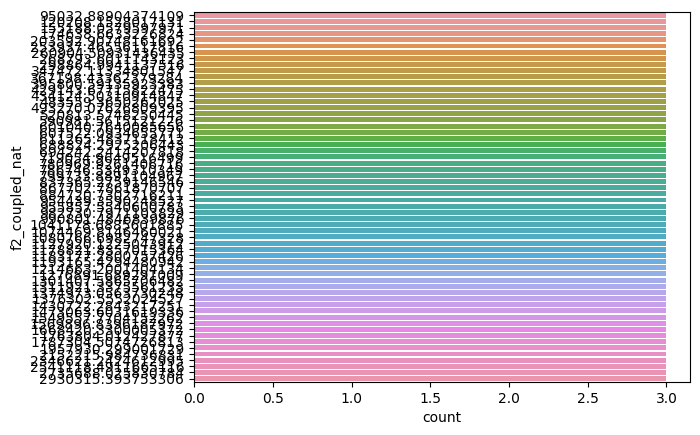

In [ ]:
sns.countplot(y="f2_coupled_nat", data=df)

In [ ]:
df2 = df[df['R_load'] != 500]



In [ ]:
df2 = df2[df2['k'] != 1]

In [ ]:
df2['R_load'].unique()

array([  1,  10, 100])

In [ ]:

df2['k'].unique()

array([0.2, 0.5, 0.7, 0.9])

In [ ]:
# Drop the k_nosplit column as it contains NaN or null values which will become a problem when doing normalisation and regression
df2 = df2.drop(['L_p','f0_coupled_nosplit', 'f_p_nat', 'f_s1', 'f_s2'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   k               180 non-null    float64
 1   factor          180 non-null    int64  
 2   R_load          180 non-null    int64  
 3   M               180 non-null    float64
 4   f1_coupled_nat  180 non-null    float64
 5   f2_coupled_nat  180 non-null    float64
 6   f_s_nat         180 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.2 KB


In [ ]:
df2.isnull().sum()

k                 0
factor            0
R_load            0
M                 0
f1_coupled_nat    0
f2_coupled_nat    0
f_s_nat           0
dtype: int64

In [ ]:
df = df.fillna(method = 'bfill')
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df2.describe()

,k,factor,R_load,M,f1_coupled_nat,f2_coupled_nat,f_s_nat
count,180.000000,180.000000,180.000000,1.800000e+02,180.000000,1.800000e+02,180.0
mean,0.575000,8.000000,37.000000,5.800108e-07,83248.862565,1.004981e+06,85000.0
std,0.259323,4.332545,44.823677,3.921551e-07,4450.804256,6.603832e+05,0.0
min,0.200000,1.000000,1.000000,1.218191e-07,61665.481259,9.503289e+04,85000.0
25%,0.425000,4.000000,1.000000,3.241617e-07,84268.197589,4.908424e+05,85000.0
50%,0.600000,8.000000,10.000000,5.100398e-07,84785.064568,9.195800e+05,85000.0
75%,0.750000,12.000000,100.000000,7.154009e-07,84915.317460,1.327684e+06,85000.0
max,0.900000,15.000000,100.000000,2.123115e-06,84992.413091,2.930315e+06,85000.0


In [ ]:
print("Dataset Lenght:: ", len(df))
print("Dataset Shape:: ", df.shape)

Dataset Lenght::  300
Dataset Shape::  (300, 29)


Plotting the Sales Distribution Plot

In [ ]:
#Feature Selection
df = df.drop(columns=['Index'])

Text(0.5, 0, 'Continuous Variable')

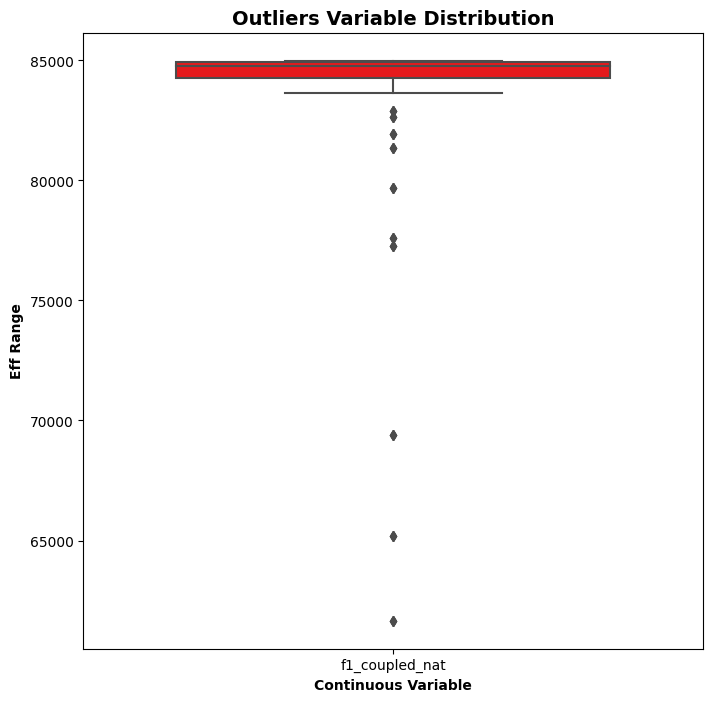

In [ ]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['f1_coupled_nat']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df2[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Eff Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

Text(0.5, 0, 'Continuous Variable')

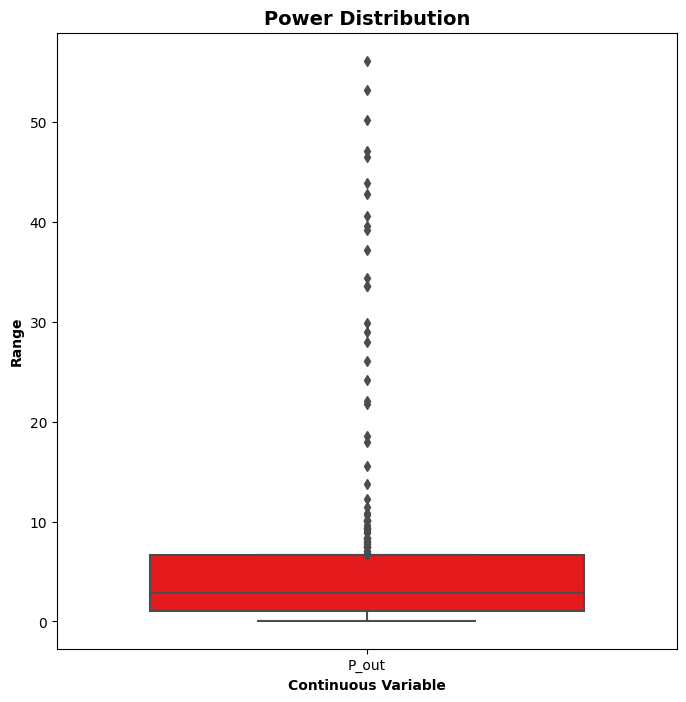

In [ ]:
columnList = ['P_out']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df2[columnList], orient="v", palette="Set1" ,whis=[0,60],saturation=1, width=0.7)
plt.title("Power Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

In [ ]:
# Calculating the Missing Values % contribution in DF

df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

k         0.0
factor    0.0
R_load    0.0
L_p       0.0
M         0.0
dtype: float64

<Axes: title={'center': 'f1 Histogram Plot'}, xlabel='f1_coupled_nat', ylabel='Count'>

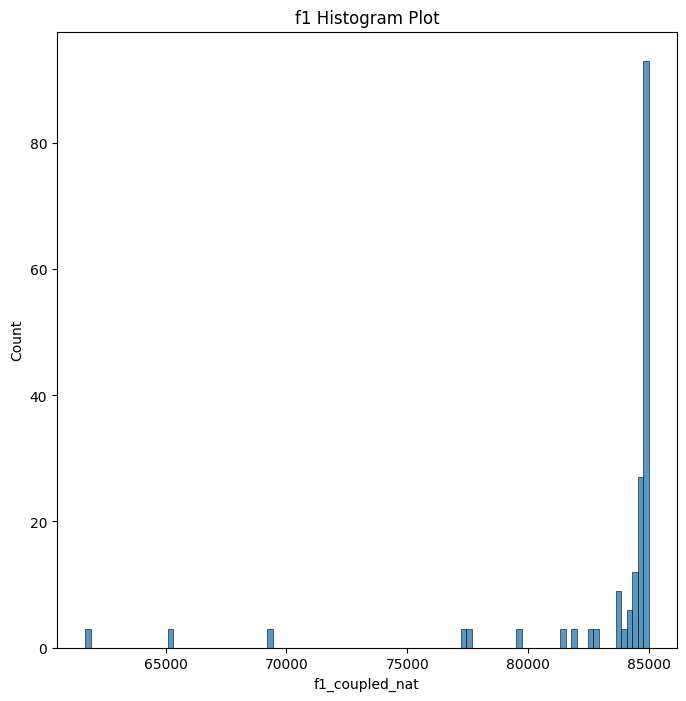

In [ ]:
plt.figure(figsize=(8,8))

plt.title('f1 Histogram Plot')
sns.histplot(df2['f1_coupled_nat'])

**Pairplot of all the numeric variables**
We find that TV has a linear relation with Sales

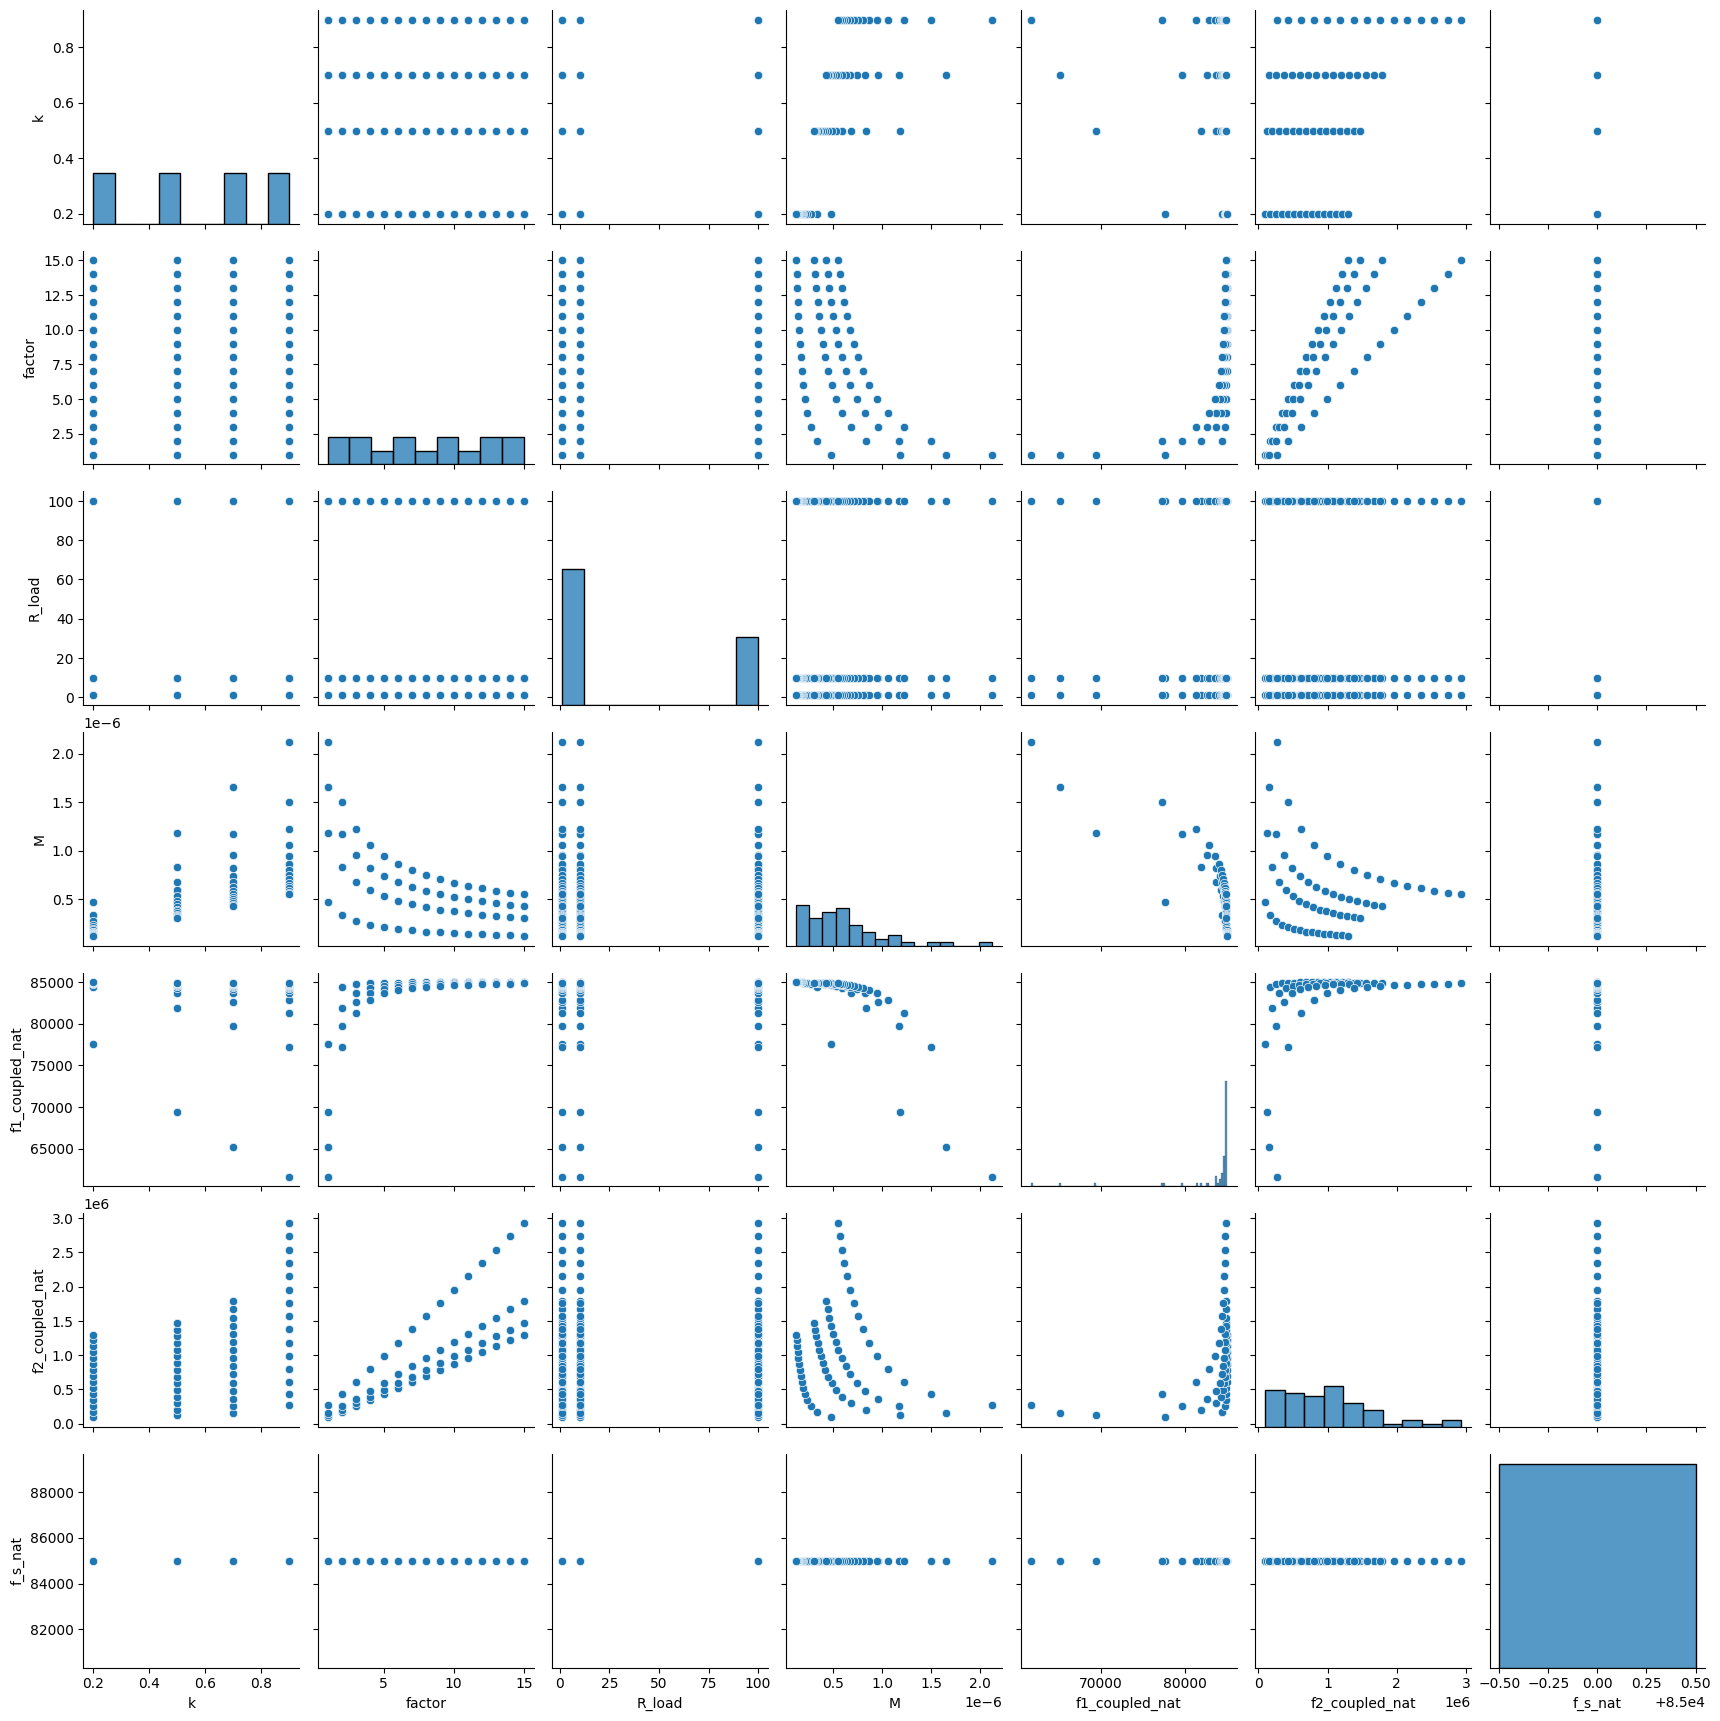

In [ ]:
sns.pairplot(df2)


In [ ]:

scatter_matrix(df2, alpha=0.2)

NameError: ignored

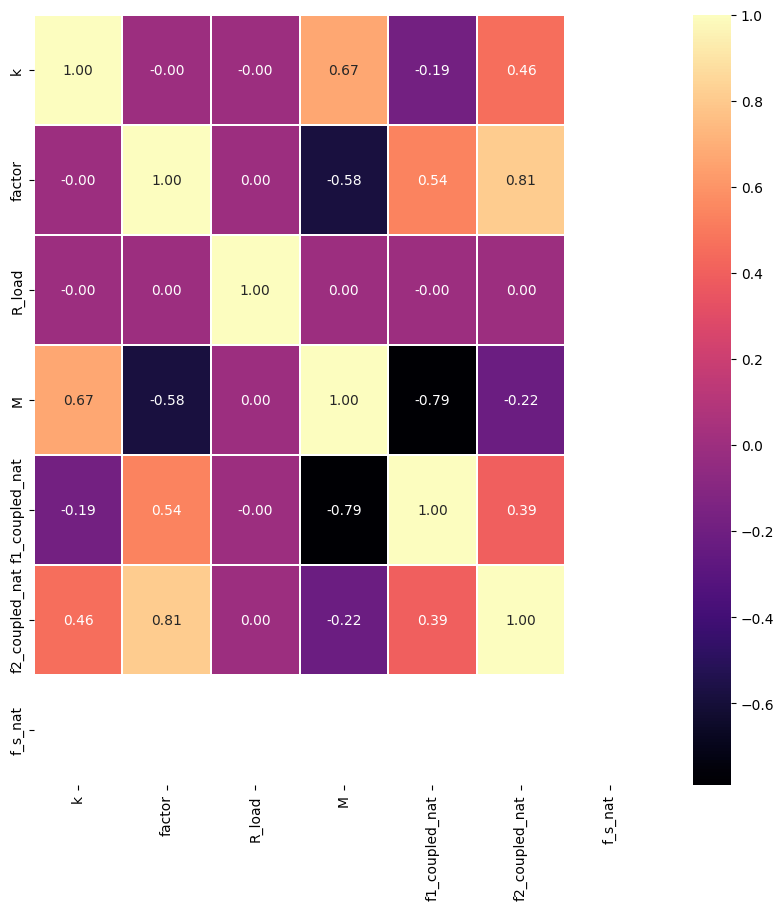

In [ ]:
#HeatMAp
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(),ax=ax,annot=True,linewidth=0.05,fmt='.2f',cmap='magma')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = df2.apply(le.fit_transform)
X_2.head()

,k,factor,R_load,M,f1_coupled_nat,f2_coupled_nat,f_s_nat
0,0,0,0,26,4,0,0
1,0,1,0,16,18,3,0
2,0,2,0,12,30,6,0
3,0,3,0,11,40,9,0
4,0,4,0,10,46,13,0


In [ ]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape


(180, 203)

In [ ]:
onehotlabels

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [ ]:
df3 = df2.drop(['f1_coupled_nat','f2_coupled_nat','M', 'R_load', 'f_s_nat'],axis=1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   k       180 non-null    float64
 1   factor  180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [ ]:
x_e = df2.drop(['f1_coupled_nat','f2_coupled_nat','M', 'R_load', 'f_s_nat'],axis=1)
y_e = df2['f1_coupled_nat']
x_e = preprocessing.normalize(x_e)
x_train_e,x_test_e,y_train_e,y_test_e = train_test_split(x_e,y_e,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:

linearRegressor = LinearRegression()
linearRegressor.fit(x_train_e, y_train_e)
y_predicted_e = linearRegressor.predict(x_test_e)
mse_e = mean_squared_error(y_test_e, y_predicted_e)
r_e = r2_score(y_test_e, y_predicted_e)
mae_e = mean_absolute_error(y_test_e,y_predicted_e)
print("Mean Squared Error:",mse_e)
print("R score:",r_e)
print("Mean Absolute Error:",mae_e)

Mean Squared Error: 394216.24106017384
R score: 0.9756035431426004
Mean Absolute Error: 364.52743501873255


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train_e)
x_poly_test = polynomial_features.fit_transform(x_test_e)
model = LinearRegression()
model.fit(x_poly, y_train_e)
y_predicted_p = model.predict(x_poly_test)
mse = mean_squared_error(y_test_e, y_predicted_p)
r = r2_score(y_test_e, y_predicted_p)
mae = mean_absolute_error(y_test_e,y_predicted_p)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 299812.24277819315
R score: 0.9814458267204118
Mean Absolute Error: 228.07395362269523


In [ ]:
print(model.coef_.shape)

(6,)


In [ ]:
coefficients = model.coef_
intercept = model.intercept_
degree=2
# Construct the equation
equation = f'y = {intercept:.2f} '

for i, coef in enumerate(coefficients[1:degree + 1]):
    variable_name = df3.columns[i]
    equation += f'+ {coef:.2f} * {variable_name}^{i + 1}'

print("Inferred equation (up to degree 3):")
print(equation)


Inferred equation (up to degree 3):
y = -74580914195384832.00 + -536164.44 * k^1+ -1839451.98 * factor^2


In [ ]:
  (-74580914195384832.00) + (-536164.44) * 0.7**1+ (-1839451.98) * 3**2

-7.458091421231522e+16

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train_e, y_train_e)
y_predicted_d = regressor.predict(x_test_e)
mse = mean_squared_error(y_test_e, y_predicted_d)
r = r2_score(y_test_e, y_predicted_d)
mae = mean_absolute_error(y_test_e,y_predicted_d)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 193.4370411296409
R score: 0.9999880289599032
Mean Absolute Error: 4.40206914728737


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=300)
rf.fit(x_train_e,y_train_e);
y_predicted_r = rf.predict(x_test_e)

mse = mean_squared_error(y_test_e, y_predicted_r)
r = r2_score(y_test_e, y_predicted_r)
mae = mean_absolute_error(y_test_e,y_predicted_r)

print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 36461.78100751115
R score: 0.9977435270934008
Mean Absolute Error: 54.273712457652636


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Feature importances
feature_importances = rf.feature_importances_
print("Feature importances:")
for feature, importance in zip(x_train_e, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature importances:
[0.09950372 0.99503719]: 0.5011
[0.03843312 0.99926117]: 0.4989


In [ ]:
feature_importance_list = list(zip(df3.columns, rf.feature_importances_))
feature_importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance:.4f}")


k: 0.5011
factor: 0.4989


In [ ]:
# Neural Networks
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(x_train_e,y_train_e,batch_size=100,epochs=35,verbose=1)
test=model.evaluate(x_test_e, y_test_e, verbose=1)




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               768       
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198401 (775.00 KB)
Trainable params: 198401 (775.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/35
2/2

In [ ]:
# temp list as a container for each layer formulas
formula_list = []
# counter of hidden layers
f_n = 1
#
for i in range(len(model.layers)):
    # get ith Keras layer's weights and biases
    layer = model.layers[i]
    W = layer.get_weights()
    # empty text string to which concatenate current layer formula parts
    formula = ''
    # set script for input layer
    if i == 0:
        for i in range(W[0].shape[1]):
            cur_weight = np.sum(W[0][0,i])
            cur_bias = np.sum(W[1][i])
            # build formula for this layer
            formula += '*'+str(np.round(cur_weight,2))+'*'+'x+'+'*'+str(np.round(cur_bias,2)) + '*'+ '/'
        # append this layer formula to temp list
        formula_list.append(formula)

    # set script for hidden layers
    elif i < len(model.layers)-1:
        # start loop for next layer each neuron
        for c in range(W[0].shape[1]):
            cur_bias = np.sum(W[1][c])
            for i in range(W[0].shape[0]):
                cur_weight = np.sum(W[0][i, c])
                # build formula for this layer using previous layer formula
                formula += '*'+str(np.round(cur_weight,2))+'*'+'f'+str(f_n)+'('+formula_list[-1].split('/')[i]+')'+'f'+str(f_n)+'+'
            formula += '*'+str(np.round(cur_bias,2))+'*' + '/'
        # append this layer formula to temp list
        formula_list.append(formula)
        # increase index number for the next hidden layer
        f_n+=1
    # set script for output layer
    else:
        for i in range(W[0].shape[0]):
            cur_weight = np.sum(W[0][i, 0])
            # build formula for this layer using previous layer formula
            formula += '*'+str(np.round(cur_weight,2))+'*'+'f'+str(f_n)+'('+formula_list[-1].split('/')[i]+')'+'f'+str(f_n)+'+'
        cur_bias = np.sum(W[1][0])
        formula += '*'+str(np.round(cur_bias,2))+'*'
        # append this layer formula to temp list
        formula_list.append(formula)
# get last formula
formula = formula_list[-1]
# make some cleanings
formula = formula.replace('+*-','-')
formula = formula.replace('+*0.0*','')
formula = formula.replace('-*0.0*','')
formula = formula.replace('*','')
print(formula)


KeyboardInterrupt: ignored

In [ ]:
from sklearn.svm import  SVR
svr = SVR(kernel='linear')
svr.fit(x_train_e, y_train_e)
y_res = svr.predict(x_test_e)
mse = mean_squared_error(y_test_e, y_res)
r = r2_score(y_test_e, y_res)
mae = mean_absolute_error(y_test_e,y_res)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 17262068.33062913
R score: -0.0682799474854574
Mean Absolute Error: 1237.9450303018684


In [ ]:
coefficients = svr.coef_
intercept = svr.intercept_
degree=3
# Construct the equation
equation = f'y = {intercept[0]:.2f} '

for i, coef in enumerate(coefficients[0,1:degree + 1]):
    variable_name = df2.columns[i]
    equation += f'+ {coef:.2f} * {variable_name}^{i + 1}'

print("Inferred equation (up to degree 3):")
print(equation)

Inferred equation (up to degree 3):
y = 84760.27 + 2.31 * k^1


In [ ]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor

In [ ]:
SGD=SGDRegressor(max_iter=1000, tol=1e-3)
SGD.fit(x_train_e, y_train_e)
y_res = SGD.predict(x_test_e)
mse = mean_squared_error(y_test_e, y_res)
r = r2_score(y_test_e, y_res)
mae = mean_absolute_error(y_test_e,y_res)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 12967243.669936333
R score: 0.1975094686555534
Mean Absolute Error: 1493.6883514318774


In [ ]:
l=Lasso(alpha=0.1)
l.fit(x_train_e, y_train_e)
y_res = l.predict(x_test_e)
mse = mean_squared_error(y_test_e, y_res)
r = r2_score(y_test_e, y_res)
mae = mean_absolute_error(y_test_e,y_res)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 12393970.516141364
R score: 0.23298703732814774
Mean Absolute Error: 1696.025139905668


In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train_e, y_train_e)
y_res = ridge.predict(x_test_e)
mse = mean_squared_error(y_test_e, y_res)
r = r2_score(y_test_e, y_res)
mae = mean_absolute_error(y_test_e,y_res)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 12421805.465098634
R score: 0.2312644443432984
Mean Absolute Error: 1630.5428603436421
